Згенегуємо два набори значень $x$ і $y$.

In [8]:
import numpy as np

x = np.random.uniform(0, 100, 100)
y = 2 * x + 1 + np.random.randint(0, 25, 100)

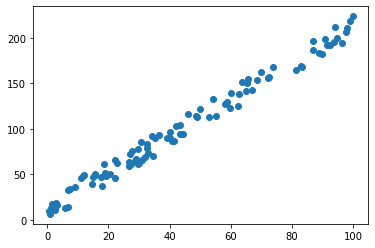

In [9]:
from matplotlib import pyplot as plt

plt.scatter(x, y)

### Завдання.

1) Знайти значення коефіцієнтів рівняння лінійної регресії $\beta_0$ та $\beta_1$:

    a) за допомогою формул з підручника (ТЙМС- II.pdf, сторінка 190 - 194);

    b) за допомогою методу градієнтного спуска для мінімазації фунції 
$$f = \frac{1}{n}\sum_{i=1}^{n}{(y_{i} - (\beta_0 + \beta_1 x_{i}))^{2}};$$ 

    c) за допомогою моделі sklearn.linear_model.LinearRegression;

2) Знайти передбачення для значення змінної $x$, що рівне 120. 

Формули з підручника:

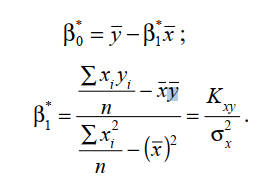

In [5]:
import numpy as np

np.random.seed(0) 
x = np.random.uniform(0, 100, 100)
y = 2 * x + 1 + np.random.randint(0, 25, 100)

n = len(x)

x_bar = np.mean(x)
y_bar = np.mean(y)

beta_1 = (np.mean(x * y) - x_bar * y_bar) / (np.mean(x**2) - x_bar**2)
beta_0 = y_bar - beta_1 * x_bar

print(f"Аналітичні коефіцієнти: β0 = {beta_0:.4f}, β1 = {beta_1:.4f}")

Аналітичні коефіцієнти: β0 = 13.1809, β1 = 2.0036


In [46]:
import numpy as np

np.random.seed(0)
x = np.random.uniform(0, 100, 100)
y = 2 * x + 1 + np.random.randint(0, 25, 100)

x_mean, x_std = np.mean(x), np.std(x)
y_mean, y_std = np.mean(y), np.std(y)
x_scaled = (x - x_mean) / x_std
y_scaled = (y - y_mean) / y_std

learning_rate = 0.0001
iterations = 100000
n = len(x)

beta_0 = 0
beta_1 = 0

for _ in range(iterations):
    y_pred = beta_0 + beta_1 * x_scaled
    
    d_beta_0 = -2 / n * np.sum(y_scaled - y_pred)
    d_beta_1 = -2 / n * np.sum((y_scaled - y_pred) * x_scaled)
    
    beta_0 -= learning_rate * d_beta_0
    beta_1 -= learning_rate * d_beta_1
    
    if np.isnan(beta_0) or np.isnan(beta_1):
        raise ValueError("NaN value encountered in parameters.")

beta_0 = beta_0 * y_std + y_mean - beta_1 * x_mean * y_std / x_std
beta_1 = beta_1 * y_std / x_std

print(f"Градієнтні коефіцієнти: β0 = {beta_0:.4f}, β1 = {beta_1:.4f}")

Градієнтні коефіцієнти: β0 = 13.1809, β1 = 2.0036


In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = np.random.uniform(0, 100, 100)
y = 2 * x + 1 + np.random.randint(0, 25, 100)

x = x.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f"Коефіцієнти sklearn: β0 = {beta_0:.4f}, β1 = {beta_1:.4f}")


Коефіцієнти sklearn: β0 = 13.1809, β1 = 2.0036


In [11]:
x_pred = 120

y_pred = beta_0 + beta_1 * x_pred
print(f"Передбачення для x = {x_pred}: y = {y_pred:.4f}")

Передбачення для x = 120: y = 253.6101
